<a href="https://colab.research.google.com/github/ShannonH98/PyTorch_Practice_Projects/blob/main/Medical_Images_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pydicom

In [ ]:
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/archive"

dicom_dir  full_archive.npz  overview.csv  SE000001  tiff_images


In [ ]:
dicom_file = pydicom.dcmread("/content/drive/My Drive/archive/dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm")

In [ ]:
print(dicom_file)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 194
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008,0000) Group Length                        UL: 430
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088218367595492

In [ ]:
dicom_file[0x0028, 0x0010]

(0028,0010) Rows                                US: 512

In [ ]:
dicom_file.Rows

512

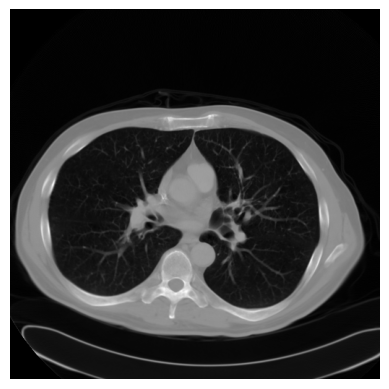

In [ ]:
ct = dicom_file.pixel_array #contains the image
plt.figure()
plt.imshow(ct, cmap = 'gray') #make it grey scale to look like a typical ct scan
plt.axis("off")
plt.show()

In [ ]:
#path_to_head_mri = Path("/content/drive/My Drive/archive/dicom_dir/") #access to all files in this directory
path_to_head_mri = Path("/content/drive/My Drive/archive/SE000001") #access to all files in this directory

In [ ]:
all_files = list(path_to_head_mri.glob("*"))

In [ ]:
len(all_files)

27

In [ ]:
all_files

[PosixPath('/content/drive/My Drive/archive/SE000001/MR000009'),
 PosixPath('/content/drive/My Drive/archive/SE000001/MR000024'),
 PosixPath('/content/drive/My Drive/archive/SE000001/MR000003'),
 PosixPath('/content/drive/My Drive/archive/SE000001/MR000008'),
 PosixPath('/content/drive/My Drive/archive/SE000001/MR000017'),
 PosixPath('/content/drive/My Drive/archive/SE000001/MR000022'),
 PosixPath('/content/drive/My Drive/archive/SE000001/MR000004'),
 PosixPath('/content/drive/My Drive/archive/SE000001/MR000015'),
 PosixPath('/content/drive/My Drive/archive/SE000001/MR000007'),
 PosixPath('/content/drive/My Drive/archive/SE000001/MR000000'),
 PosixPath('/content/drive/My Drive/archive/SE000001/MR000018'),
 PosixPath('/content/drive/My Drive/archive/SE000001/MR000001'),
 PosixPath('/content/drive/My Drive/archive/SE000001/MR000011'),
 PosixPath('/content/drive/My Drive/archive/SE000001/MR000014'),
 PosixPath('/content/drive/My Drive/archive/SE000001/MR000019'),
 PosixPath('/content/driv

In [ ]:
mri_data = []

for path in all_files:
  mri_data.append(pydicom.dcmread(path))

In [ ]:
for slice in mri_data[:5]:
  print(slice.SliceLocation)

53.9999958207213
143.999998928727
17.9999979772582
47.9999970362677
101.999994745866


In [ ]:
mri_data_ordered = sorted(mri_data, key = lambda x: x.SliceLocation)

In [ ]:
full_volume = []
for slice in mri_data_ordered:
  full_volume.append(slice.pixel_array)

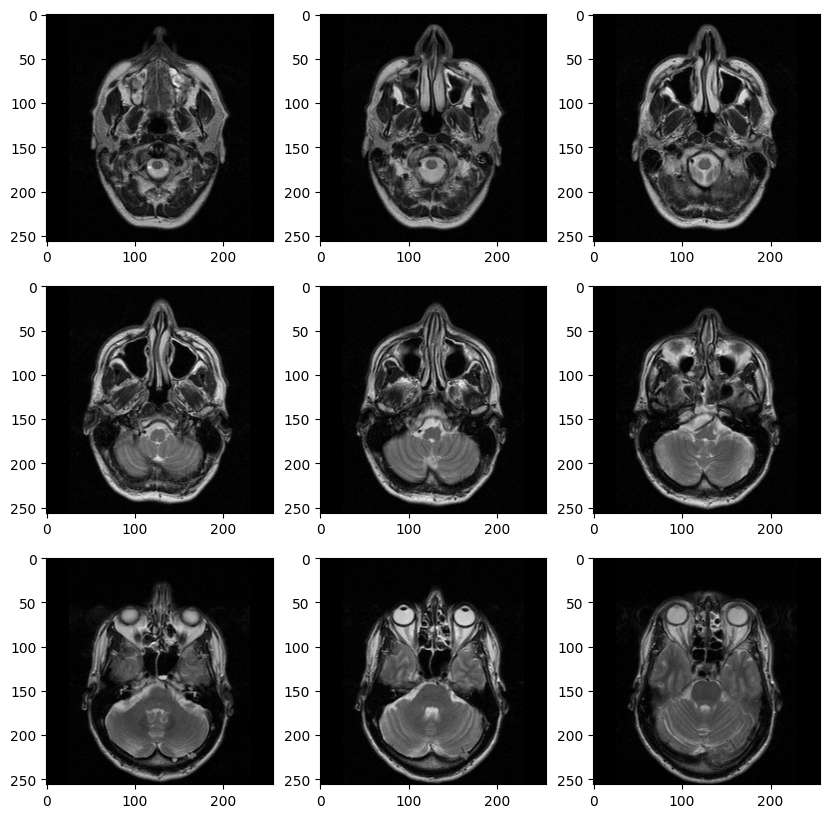

In [ ]:
fig, axis = plt.subplots(3, 3, figsize = (10, 10))

counter = 0
for i in range(3):
  for j in range(3):
  #axis[i].imshow(full_volume[i], cmap = 'gray')
    axis[i][j].imshow(full_volume[counter], cmap = 'gray')
    counter += 1

In [ ]:
%pip install SimpleITK
import SimpleITK as sitk

In [ ]:
series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_head_mri))
print(series_ids)

('1.3.46.670589.11.0.0.11.4.2.0.12098.5.4500.2015011413262801702',)


In [ ]:
series_file_name = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(path_to_head_mri), series_ids[0])
series_file_name

('/content/drive/My Drive/archive/SE000001/MR000000',
 '/content/drive/My Drive/archive/SE000001/MR000001',
 '/content/drive/My Drive/archive/SE000001/MR000002',
 '/content/drive/My Drive/archive/SE000001/MR000003',
 '/content/drive/My Drive/archive/SE000001/MR000004',
 '/content/drive/My Drive/archive/SE000001/MR000005',
 '/content/drive/My Drive/archive/SE000001/MR000006',
 '/content/drive/My Drive/archive/SE000001/MR000007',
 '/content/drive/My Drive/archive/SE000001/MR000008',
 '/content/drive/My Drive/archive/SE000001/MR000009',
 '/content/drive/My Drive/archive/SE000001/MR000010',
 '/content/drive/My Drive/archive/SE000001/MR000011',
 '/content/drive/My Drive/archive/SE000001/MR000012',
 '/content/drive/My Drive/archive/SE000001/MR000013',
 '/content/drive/My Drive/archive/SE000001/MR000014',
 '/content/drive/My Drive/archive/SE000001/MR000015',
 '/content/drive/My Drive/archive/SE000001/MR000016',
 '/content/drive/My Drive/archive/SE000001/MR000017',
 '/content/drive/My Drive/ar

In [ ]:
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_name)

In [ ]:
image_data = series_reader.Execute()

In [ ]:
head_mri = sitk.GetArrayFromImage(image_data)

In [ ]:
head_mri.shape

(27, 256, 256)

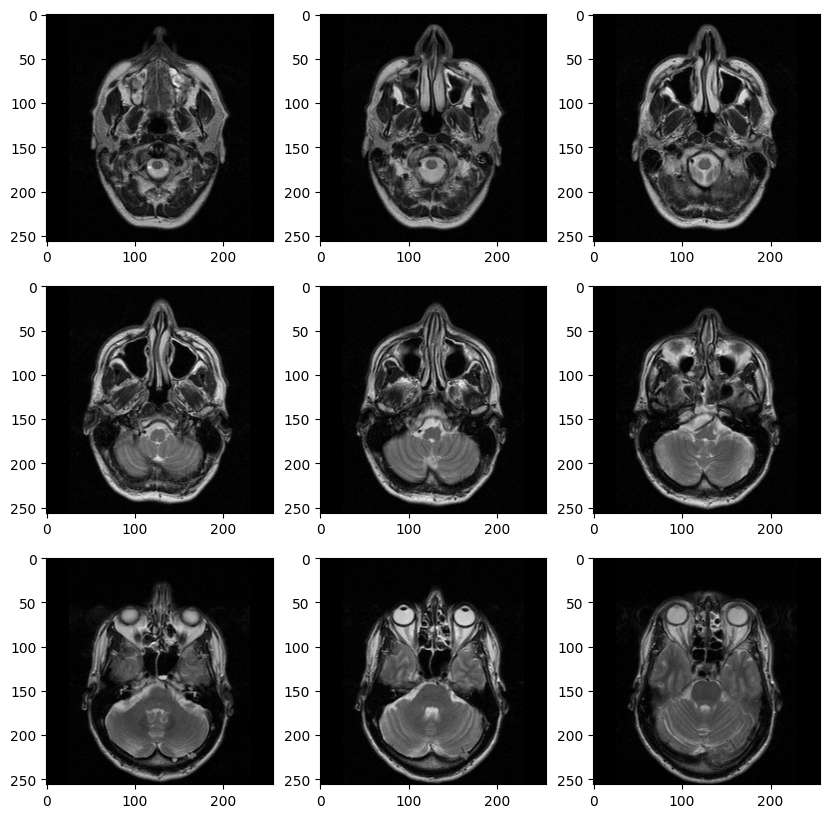

In [ ]:
fig, axis = plt.subplots(3, 3, figsize = (10, 10))

counter = 0
for i in range(3):
  for j in range(3):
  #axis[i].imshow(full_volume[i], cmap = 'gray')
    axis[i][j].imshow(head_mri[counter], cmap = 'gray')
    counter += 1